# **PLANT DISEASE PREDICTION BY SAKSHI SRIVASTAVA**
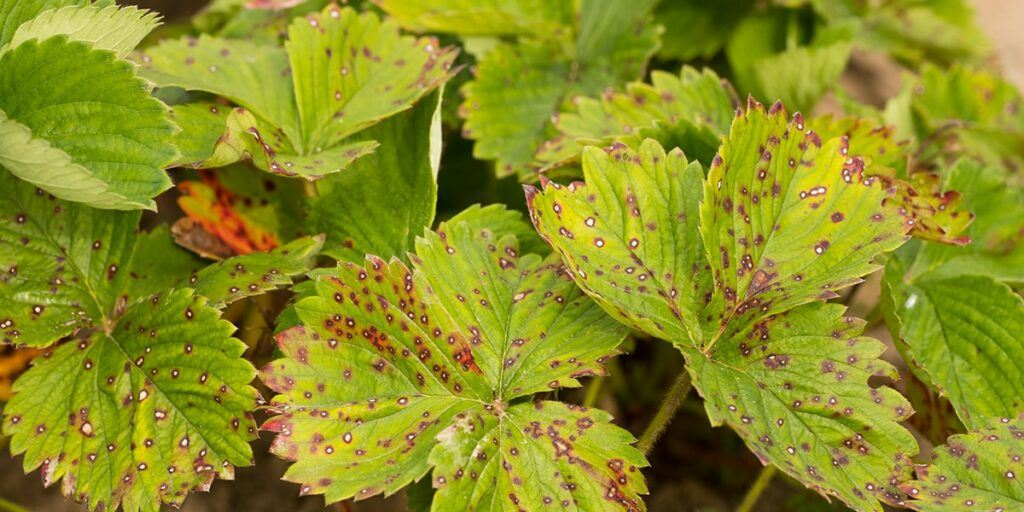


**IMPORTING LIBRARIES**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sakshi1922","key":"070b3383018884414ac50b01ce8f2bd8"}'}

In [ ]:
!mkdir -p ~/.kaggle          # Create hidden kaggle folder
!cp kaggle.json ~/.kaggle/   # Move your json file
!chmod 600 ~/.kaggle/kaggle.json  # Secure it


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
!unzip new-plant-diseases-dataset.zip -d plant_disease_data


Streaming output truncated to the last 5000 lines.
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d

In [ ]:
import os

# List contents of the main folder
print(os.listdir('plant_disease_data'))



['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']


In [ ]:
print("1.", os.listdir('plant_disease_data/New Plant Diseases Dataset(Augmented)'))
print("2.", os.listdir('plant_disease_data/new plant diseases dataset(augmented)'))



1. ['New Plant Diseases Dataset(Augmented)']
2. ['New Plant Diseases Dataset(Augmented)']


In [ ]:
print(os.listdir('plant_disease_data/New Plant Diseases Dataset(Augmented)'))

['New Plant Diseases Dataset(Augmented)']


In [ ]:
train_dir = 'plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'


In [ ]:
import os

# Path to the unzipped training data
train_dir = 'plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

# List categories
categories = os.listdir(train_dir)
print(f"Total classes: {len(categories)}")
print("Example classes:", categories[:5])


Total classes: 38
Example classes: ['Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Peach___healthy']


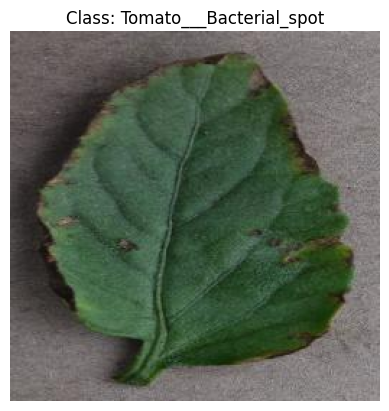

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_class = categories[0]
sample_image_path = os.path.join(train_dir, sample_class, os.listdir(os.path.join(train_dir, sample_class))[0])

img = mpimg.imread(sample_image_path)
plt.imshow(img)
plt.title(f"Class: {sample_class}")
plt.axis('off')
plt.show()


# **Data Preprocessing**

**Training Image preprocessing**

In [ ]:
#train_dir = 'plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)





Found 70295 files belonging to 38 classes.


**Validation Image Preprocessing**

In [ ]:
valid_dir = 'plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


To avoid Overshooting Loss function
Choose small learning rate default 0.001 here we have taken 0.0001
There may be chance of underfitting so increase number of neuron
Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

**MODEL**

In [ ]:
cnn = tf.keras.models.Sequential()

**CNN**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

**Compiling and Training Phase**

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 157s 65ms/step - accuracy: 0.3862 - loss: 2.1956 - val_accuracy: 0.8446 - val_loss: 0.4847
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.8360 - loss: 0.5248 - val_accuracy: 0.9066 - val_loss: 0.2899
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 62ms/step - accuracy: 0.9019 - loss: 0.3037 - val_accuracy: 0.9243 - val_loss: 0.2360
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.9346 - loss: 0.2030 - val_accuracy: 0.9375 - val_loss: 0.2040
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9511 - loss: 0.1515 - val_accuracy: 0.9528 - val_loss: 0.1517
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 66ms/step - accuracy: 0.9622 - loss: 0.1148 - val_accuracy: 0.9592 - val_loss: 0.1339
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 66ms/step - accuracy: 0.9695 - loss: 0.0957 - val_accuracy: 0.9558 - val_loss: 0.1426
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 

**Evaluating Model**

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9905 - loss: 0.0298
Training accuracy: 0.9910235404968262


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9657 - loss: 0.1132
Validation accuracy: 0.9636353254318237


**SAVING THE MODEL**

In [ ]:
cnn.save('trained_plant_disease_model.keras')


In [ ]:
from google.colab import files
files.download('trained_plant_disease_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
training_history.history #Return Dictionary of history


{'accuracy': [0.5937833189964294,
  0.8570168614387512,
  0.9128103256225586,
  0.9397538900375366,
  0.9547194242477417,
  0.9642648696899414,
  0.9708371758460999,
  0.9754178524017334,
  0.9786756038665771,
  0.9820186495780945],
 'loss': [1.3854594230651855,
  0.45307356119155884,
  0.268308162689209,
  0.18562495708465576,
  0.1391131728887558,
  0.10955111682415009,
  0.08937857300043106,
  0.07606283575296402,
  0.06498735398054123,
  0.055821504443883896],
 'val_accuracy': [0.8445823192596436,
  0.9066128134727478,
  0.9243113994598389,
  0.9374573230743408,
  0.9527657628059387,
  0.9591964483261108,
  0.9557819366455078,
  0.9524242877960205,
  0.954359233379364,
  0.9636353254318237],
 'val_loss': [0.4847463369369507,
  0.2899058759212494,
  0.23601454496383667,
  0.20400913059711456,
  0.15174470841884613,
  0.13386622071266174,
  0.14264677464962006,
  0.1562168449163437,
  0.1616293340921402,
  0.12277287989854813]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [ ]:
import json
from google.colab import files

# Step 1: Save training history as JSON
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

# Step 2: Download the file
files.download('training_history.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


**Accuracy Visualization**

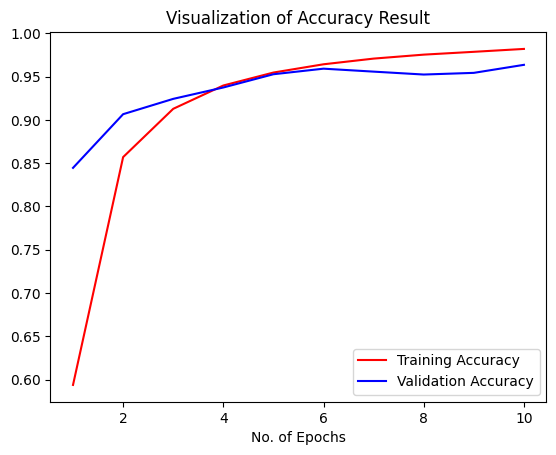

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


**Other metrics for model evaluation**

In [ ]:
class_name = validation_set.class_names


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)


In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.95      1.00      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.94      0.97       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.85      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.98      0.

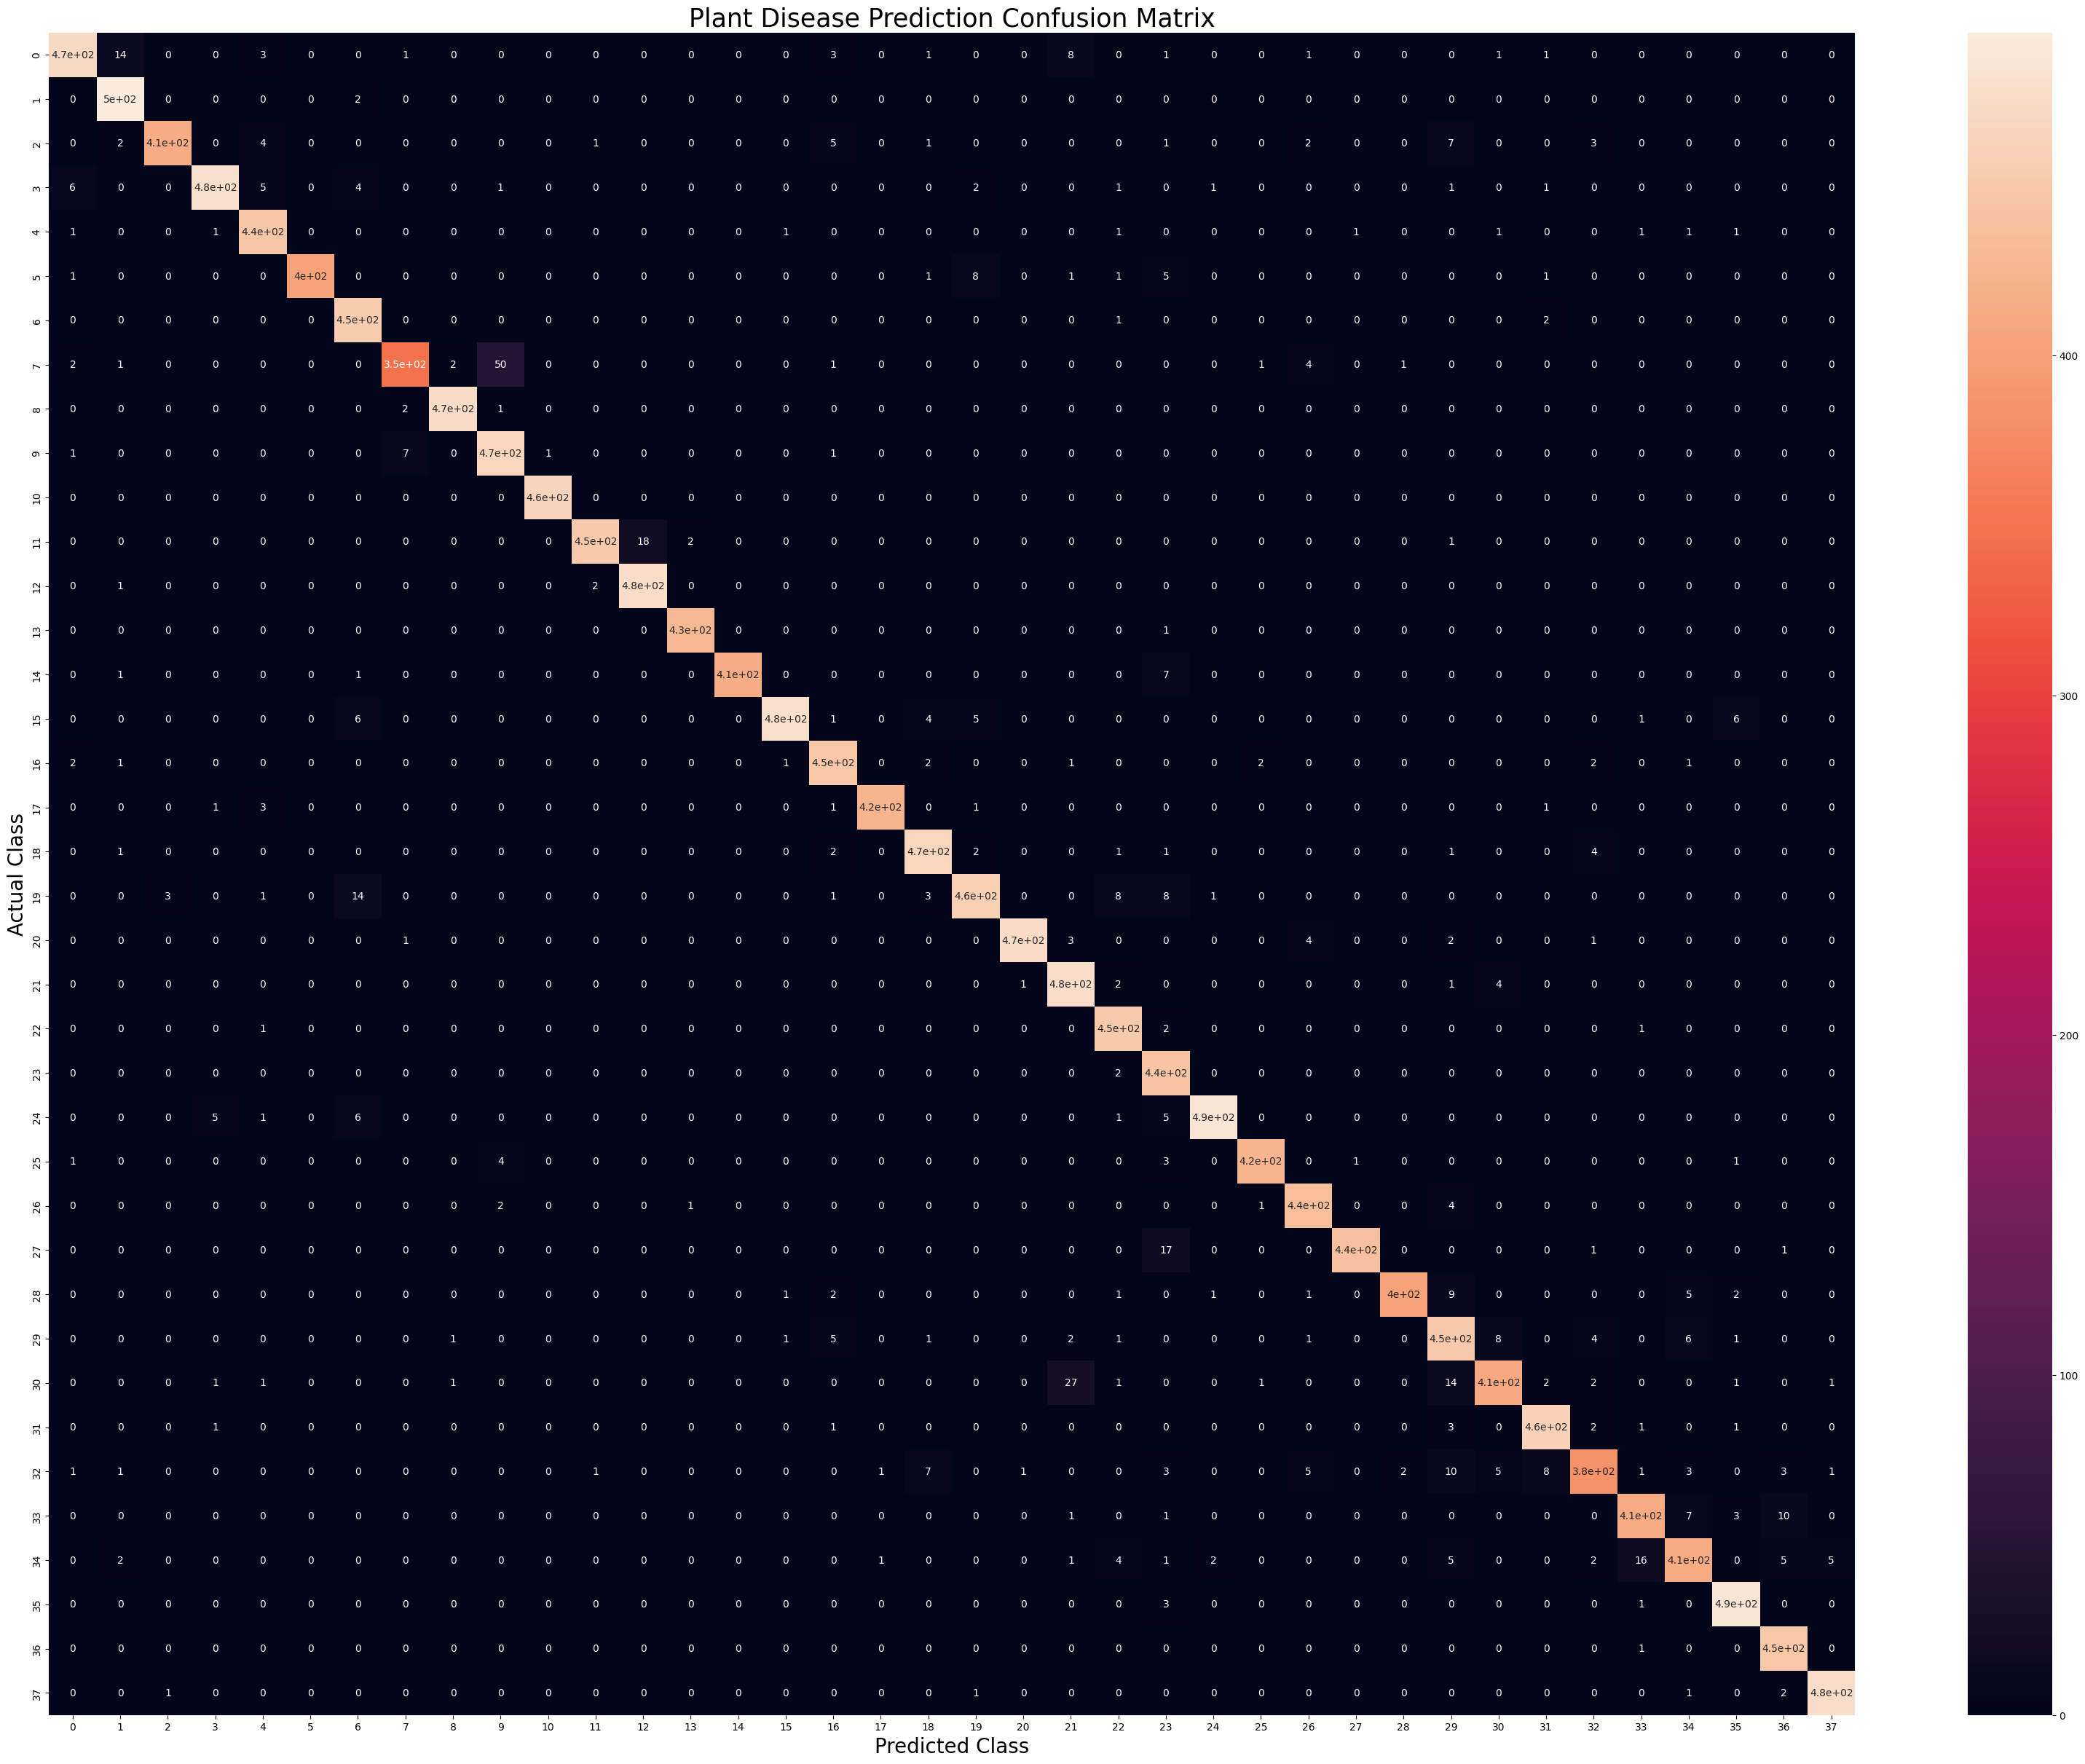

In [ ]:
import seaborn as sns
plt.figure(figsize=(40, 30))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()